In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes_dataset.csv')

In [3]:
new_column_names = {
    'education_level': 'education',
    'income_level': 'income',
    'employment_status': 'employment',
    'smoking_status': 'smoking',
    'alcohol_consumption_per_week': 'alcohol_weekly',
    'physical_activity_minutes_per_week': 'activity_mins',
    'diet_score': 'diet',
    'sleep_hours_per_day': 'sleep_hours',
    'screen_time_hours_per_day': 'screen_time',
    'family_history_diabetes': 'fh_diabetes',
    'hypertension_history': 'hypertension',
    'cardiovascular_history': 'cardio_history',
    'waist_to_hip_ratio': 'waist_hip_ratio',
    'systolic_bp': 'sys_bp',
    'diastolic_bp': 'dia_bp',
    'cholesterol_total': 'chol_total',
    'hdl_cholesterol': 'hdl',
    'ldl_cholesterol': 'ldl',
    'glucose_fasting': 'gluc_fast',
    'glucose_postprandial': 'gluc_post',
    'insulin_level': 'insulin',
    'diabetes_risk_score': 'risk_score',
    'diabetes_stage': 'stage',
    'diagnosed_diabetes': 'diabetes'
}

# Rename columns using the mapping
data.rename(columns=new_column_names, inplace=True)

# Display updated columns
print(data.columns)

Index(['age', 'gender', 'ethnicity', 'education', 'income', 'employment',
       'smoking', 'alcohol_weekly', 'activity_mins', 'diet', 'sleep_hours',
       'screen_time', 'fh_diabetes', 'hypertension', 'cardio_history', 'bmi',
       'waist_hip_ratio', 'sys_bp', 'dia_bp', 'heart_rate', 'chol_total',
       'hdl', 'ldl', 'triglycerides', 'gluc_fast', 'gluc_post', 'insulin',
       'hba1c', 'risk_score', 'stage', 'diabetes'],
      dtype='object')


In [4]:
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include='number')

print('Categorical Columns')
display(cat.head())
print('\nNumerical Columns')
display(num.head())

Categorical Columns


,gender,ethnicity,education,income,employment,smoking,stage
0,Male,Asian,Highschool,Lower-Middle,Employed,Never,Type 2
1,Female,White,Highschool,Middle,Employed,Former,No Diabetes
2,Male,Hispanic,Highschool,Middle,Unemployed,Never,Type 2
3,Female,Black,Highschool,Low,Retired,Never,Type 2
4,Male,White,Graduate,Middle,Retired,Never,Type 2



Numerical Columns


,age,alcohol_weekly,activity_mins,diet,sleep_hours,screen_time,fh_diabetes,hypertension,cardio_history,bmi,...,chol_total,hdl,ldl,triglycerides,gluc_fast,gluc_post,insulin,hba1c,risk_score,diabetes
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,239,41,160,145,136,236,6.36,8.18,29.6,1
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,116,55,50,30,93,150,2.00,5.63,23.0,0
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,213,66,99,36,118,195,5.07,7.51,44.7,1
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,171,50,79,140,139,253,5.28,9.03,38.2,1
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,210,52,125,160,137,184,12.74,7.20,23.5,1


In [5]:
#Encoding Categorical Features
import joblib 
from sklearn.preprocessing import LabelEncoder
for i in cat.columns:
  encoder = LabelEncoder()
  data[i] = encoder.fit_transform(data[i])
  joblib.dump(encoder, open(f'{i}_encoder.pki','wb'))

data.head(10)

,age,gender,ethnicity,education,income,employment,smoking,alcohol_weekly,activity_mins,diet,...,hdl,ldl,triglycerides,gluc_fast,gluc_post,insulin,hba1c,risk_score,stage,diabetes
0,58,1,0,1,2,0,2,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,4,1
1,48,0,4,1,3,0,1,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,1,0
2,60,1,2,1,3,3,2,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,4,1
3,74,0,1,1,1,1,2,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,4,1
4,46,1,4,0,3,1,2,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,4,1
5,46,0,4,1,4,0,2,2,124,9.0,...,61,119,179,100,133,8.77,6.03,23.5,2,0
6,75,0,4,0,4,1,2,0,53,9.2,...,46,161,155,101,100,10.14,5.24,36.1,2,0
7,62,1,4,3,3,3,0,1,75,4.1,...,49,159,120,110,189,8.96,7.04,34.2,4,1
8,42,1,1,1,2,0,0,1,114,6.7,...,33,132,98,116,172,5.70,6.90,26.7,4,1
9,59,0,4,0,3,0,0,3,86,8.2,...,52,103,104,76,109,4.49,4.99,30.0,1,0


In [6]:
#  Drop least important columns (based on feature importance chart)
columns_to_drop = [
    'gender',
    'income',
    'education',
    'employment',
    'hypertension',
    'alcohol_weekly',
    'waist_hip_ratio'
]

data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [7]:
#  Confirm remaining columns
print("Remaining columns after feature selection:")
print(data.columns.tolist())

Remaining columns after feature selection:
['age', 'ethnicity', 'smoking', 'activity_mins', 'diet', 'sleep_hours', 'screen_time', 'fh_diabetes', 'cardio_history', 'bmi', 'sys_bp', 'dia_bp', 'heart_rate', 'chol_total', 'hdl', 'ldl', 'triglycerides', 'gluc_fast', 'gluc_post', 'insulin', 'hba1c', 'risk_score', 'stage', 'diabetes']


In [8]:
# Separate features and target variable
x = data.drop(columns=['diabetes'], errors='ignore')
y = data['diabetes']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size= 0.2, random_state= 40)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'ytest: {ytest.shape}')

Xtrain: (80000, 23)
Xtest: (20000, 23)
Ytrain: (80000,)
ytest: (20000,)


In [9]:
# Model training
model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # let it grow fully
    random_state=42,
    class_weight='balanced' # helps with class imbalance
)

model.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [10]:
prediction = model.predict(xtrain)
accuracy = accuracy_score(ytrain, prediction)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(ytrain, prediction))

Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32021
           1       1.00      1.00      1.00     47979

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [11]:
prediction = model.predict(xtest)
accuracy = accuracy_score(ytest, prediction)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(ytest, prediction))

Model Accuracy: 99.94%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7981
           1       1.00      1.00      1.00     12019

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



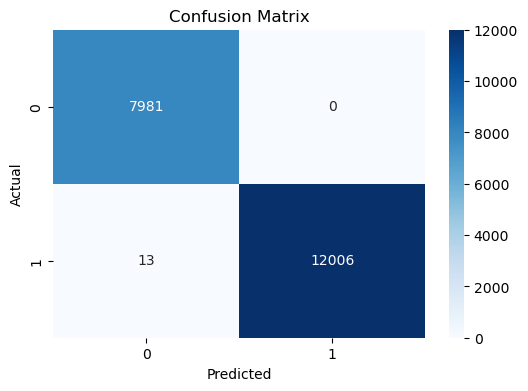

In [12]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, prediction), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

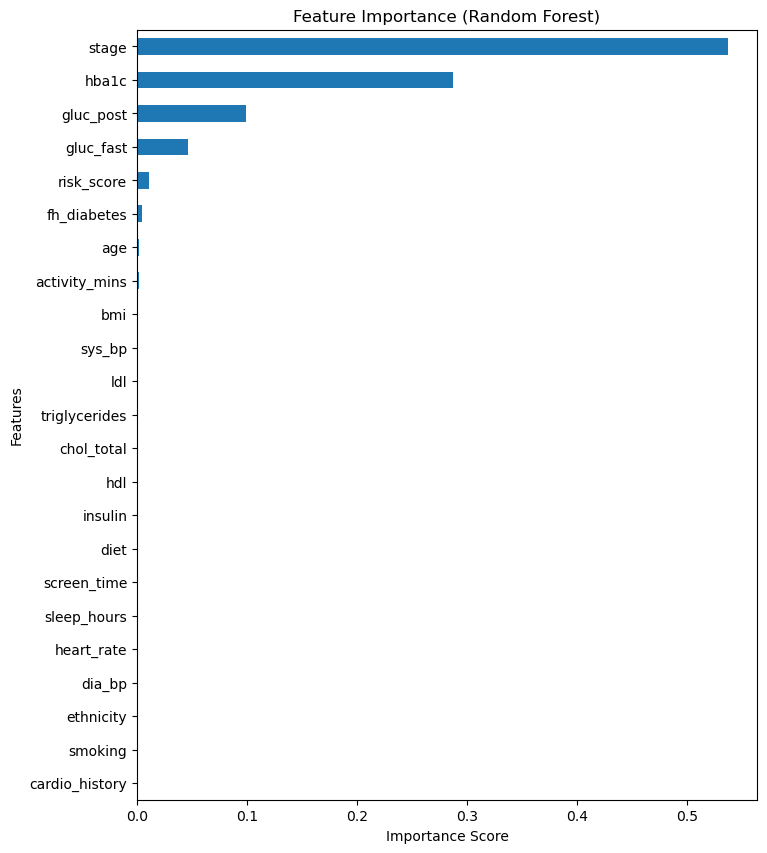

In [13]:
# Feature Importance Visualization

importances = model.feature_importances_
feat_importance = pd.Series(importances, index=x.columns).sort_values(ascending=True)

plt.figure(figsize=(8,10))
feat_importance.plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [16]:
# to save our model
joblib.dump(model, open('Diabetes_indicator.pkl','wb'))